# Project - Boston Housing Data Analysis
***

## Introduction

In this notebook I will be analysing and evaluating data on the housing values in the suburbs of Boston, US. Most notably, looking for differences or patterns within the dataset with which I can really test out my data munging and visualisation skills.


This dataframe contains the following columns 

- ```crim```: per capita crime rate by town
- ```zn```: proportion of residential land zoned for lots over 25,000 sq ft
- ```indus```: proportion of non-retail business acres per town
- ```chas```: Charles river dummy variable (= 1 if tract bounds river; 0 otherwise)
- ```nox```: nitrogen oxide concentration (parts per 10 million)
- ```rm```: average number of rooms per dwelling
- ```age```: proportion of owner-occupied units built prior to 1940
- ```dis```: weighted mean of distances to five Boston employment centers
- ```rad```: index of accessibility to radial highways
- ```tax```: full-value property-tax rate per \\$10,000
- ```ptratio```: pupil-teacher ratio by town
- ```b```: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town
- ```lstat```: lower status of the population (percent)
- ```medv```: median value of owner-occupied homes in $10000s

***


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
print(len(df))
df.head()

333


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


## Exploring the dataset

I like to explore the dataset first and foremost with some simple visualisations. I will draw on some of the specific data columns to get a feel of the society in Boston and see if anything jumps out at me

Text(0, 0.5, 'Number of houses')

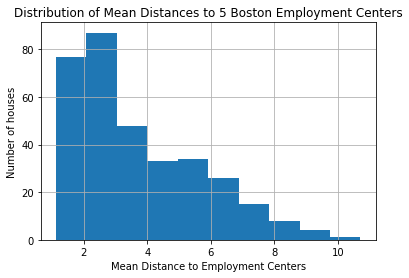

In [4]:
df['dis'].hist()
plt.title('Distribution of Mean Distances to 5 Boston Employment Centers')
plt.xlabel('Mean Distance to Employment Centers')
plt.ylabel('Number of houses')

We can see from the above histogram that most houses in this sample are quite close to the employment centers of Boston. We have an obvious skewed distribution here.

Text(0, 0.5, 'Number of Houses')

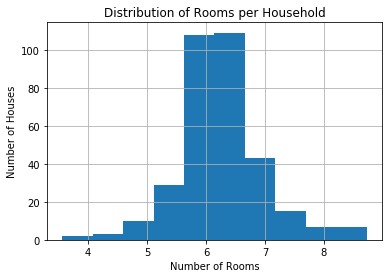

In [5]:
df['rm'].hist()
plt.title('Distribution of Rooms per Household')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Houses')

The number of rooms in all houses are distributed normally and have a mean around 6. Either side of this, there are more larger homes than there smaller

Text(0, 0.5, 'Number of Houses')

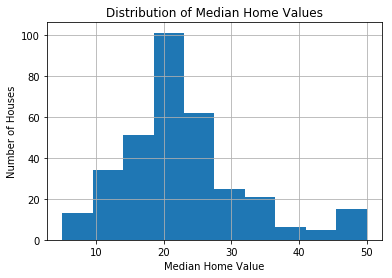

In [6]:
df['medv'].hist()
plt.title('Distribution of Median Home Values')
plt.xlabel('Median Home Value')
plt.ylabel('Number of Houses')

Most homes are valued at around 200k, which at this early stage we could deduce that many of them will be 6 room households. Whats striking here is that, one would normally assume all the values and room numbers would be extremely close to similar on the above graphs. Yet, it seems that there are many more houses below the average value than there are houses with below average room numbers.

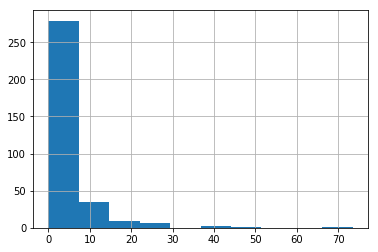

In [7]:
df['crim'].hist()


Above shows the crime rate per capita. Most of which are well below 10, lets see some quantiles for this data in comparison to the max value which confirms the above

In [8]:
df['crim'].quantile(.5)

0.26169000000000003

In [9]:
df['crim'].max()

73.5341

In [10]:
df['crim'].quantile(.9)

9.958202

Boxplot to display the median home value 

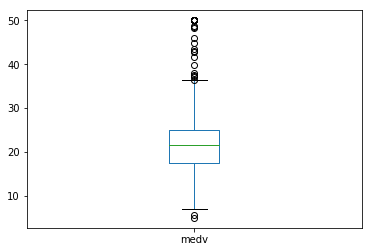

In [11]:
df['medv'].plot(kind='box')

We can clearly see here our distribution of house values between around 5 and 35, leaving many outliers outside this range. This visualisation shows much clearer a link now with the 'number of rooms' histogram we looked at in the first instance. Looking at just the histograms first I was thrown off but this box plot seems to agree with the assumption that amount of rooms are equal to value of the house. 

## Investigating correlations

In [16]:
import numpy as np

for n, feat1 in enumerate(df.columns):
    for feat2 in df.columns[n+1:]:
        r2 = np.corrcoef(df[feat1], df[feat2])[0][1]
        if r2 > .7:
            print('{} and {} have a correlation coefficient of {}!'.format(feat1, feat2, r2))

ID and rad have a correlation coefficient of 0.7075262711727565!
indus and nox have a correlation coefficient of 0.7500874390908759!
indus and tax have a correlation coefficient of 0.7083132697607584!
nox and age have a correlation coefficient of 0.7359995828422857!
rad and tax have a correlation coefficient of 0.9035618963206118!


Text(0.5, 1.0, 'Average home values by home age')

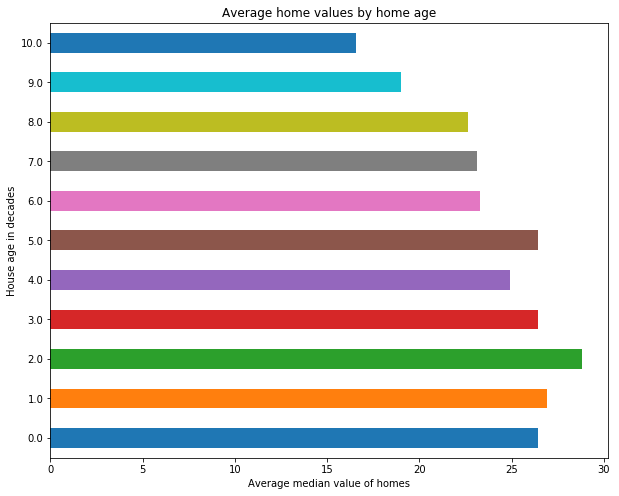

In [17]:
df['decades'] = df.age // 10
to_plot = df.groupby('decades').medv.mean()
to_plot.plot(kind='barh', figsize=(10, 8))
plt.ylabel('House age in decades')
plt.xlabel('Average median value of homes')
plt.title('Average home values by home age')

It is clear to see here that the approximate age of the house convincingly increases with its youth. Barring two slight variances at 20 and 50 years. 